In [216]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import plot_style_utils

def plot_3d_figure(X, Y, Z, save_path="figures/3d_surface_plot"):
    
    plot_style_utils.set_pub_plot_context(context="talk")
    fig, ax = plot_style_utils.simple_ax(figsize=(10, 8), projection='3d')
    plot_style_utils.prettify_ax(ax)
    surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0.2, antialiased=True, edgecolor='black')
    surf.set_alpha(1)

    # make the wireframe not overlap with the surface
    ax.set_zorder(1)

    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.view_init(elev=20, azim=-45)  # Adjust for better viewing angle
    if save_path:
        plot_style_utils.save_for_pub(fig, path=save_path, dpi=300)
    else:
        plt.show()

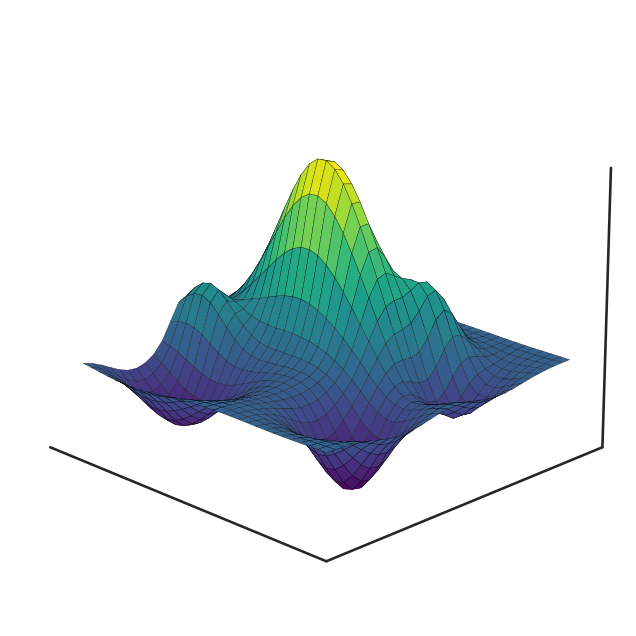

In [217]:
# --- Generate sample data ---

# Define function to create a 2D Gaussian-like distribution
def gaussian_2d(x, y, x0, y0, sigma_x, sigma_y):
    return np.exp(-((x - x0) ** 2 / (2 * sigma_x**2) + (y - y0) ** 2 / (2 * sigma_y**2)))

# Create a grid of points
x = np.linspace(0, 10, 30)
y = np.linspace(0, 20, 30)
X, Y = np.meshgrid(x, y)

# Generate data for the "energy landscape"d
def generate_z_given_centers(X, Y, pos_centers, neg_centers):
    Z = np.zeros_like(X)
    for i, center in enumerate(pos_centers):
        Z += center[2] * gaussian_2d(X, Y, center[0], center[1], center[3], center[4])

    for i, center in enumerate(neg_centers):
        Z -= center[2] * gaussian_2d(X, Y, center[0], center[1], center[3], center[4])
    return Z

pos_centers = [(1, 8, .6, 1, 1), (4, 12, 2, 1.8, 1.5), (7, 15, 1, 1, 1.4)]# , (5, 4, 1, 1, 1)]
neg_centers = [(2, 4, .7, 1.5, 2), (8, 6, .9, 1, 2), (8, 14, .8, 1, 2),]# (5, 8, 1, .5, .5)]
Z = generate_z_given_centers(X, Y, pos_centers, neg_centers)

plot_3d_figure(X, Y, Z, save_path="figures/3d_surface_plot")